## Setup

### Support code

To get started, the code cell below imports the requisite standard Python modules, plus a setup module `cm50268_lab1_setup` specific to this lab. This module contains:

- the class `DataGenerator` to synthesise all the data sets needed,
- the class `RBFGenerator` to create the necessary Gaussian "RBF" basis matrices for varying data sets,
- the function `error_rms` to simply calculate errors for a given target values $t$ and corresponding model output $y$.

We also set some "constants" below: data set sizes and the generative noise standard deviation, which we fix at $\sigma=0.1$ for the entire exercise.


In [1]:
%matplotlib inline
# Standard modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Lab-specific support module
import CM50268_CW1_Setup as lab1
#
N_train = 12
N_val   = N_train
N_test  = 250
#
sigma = 0.1
s2    = sigma**2


### Generate Data
We synthesise three data sets:
- training set of size $N_{train}=12$ with added noise $\sigma=0.1$
- validation set of size $N_{val}=12$ with added noise $\sigma=0.1$
- test set of size $N_{test}=250$ with **no noise** and **covers the full state space**

**Note:** we assume $\sigma$ is known and fixed. A feature of the test set is that *it will include data from a region where there is no training data*.

### Generate Basis
For our linear model, we use as many functions as data points (a "complete" basis), comprising $N-1$ equally-spaced Gaussian functions (of width 1), plus a fixed "bias" or "offset". If we call `evaluate` on the basis generator, we get a $N\times{}M$ matrix $\mathbf{\Phi}$ returned, where each column / row contains the output of each basis function on each data point respectively: that is, $\mathbf{\Phi}_{nm} = \phi_m(x_n)$. The use of a bias means the first column contains simply a fixed value of one. 

For the training and validation set, this matrix $\mathbf{\Phi}$ will be $12\times 12$, whereas for the test set it will be $250 \times 12$.

For illustration, the data and the underlying "ground-truth" (sine wave) are shown below, with basis functions overlaid.

<img src="data-and-basis.png" alt="Data and basis" style="width: 500px;"/>


In [2]:
# Data - create generator instance, and synthesise 3 sets
#
generator = lab1.DataGenerator(noise=sigma)
#
(x_train, y_train) = generator.get_data('TRAIN', N_train)
(x_val, y_val) = generator.get_data('VALIDATION', N_val)
(x_test, y_test) = generator.get_data('TEST', N_test)

# Basis - create generator instance and compute the basis matrices for all 3 data sets
# Note that because we use a "bias" function, we need N-1 Gaussians to make the
# basis "complete" (i.e. for M=N)
#
M = N_train-1
r = 1 # Basis radius or width
centres = np.linspace(generator.xmin, generator.xmax, M)
basis = lab1.RBFGenerator(centres, width=r, bias=True)
#
PHI_train = basis.evaluate(x_train)
PHI_val = basis.evaluate(x_val)
PHI_test = basis.evaluate(x_test)

## Task 1a 
**(2 marks)**

Write a function `fit_pls` (its signature is defined in the cell below) to fit a linear model with basis matrix `PHI_train` to the training data `y_train` for a given value of regularisation parameter $\lambda$. It should return the weight vector $\mathbf{w}_{PLS}$ that minimises the penalised least squares error.

You may find the functions `np.linalg.lstsq` and/or `np.linalg.inv` applicable.

The ideal solution will treat $\lambda=0$ case differently to $\lambda>0$.


In [3]:
## FIT_PLS
##
def fit_pls(PHI, y, lam):
    #
    #### **** YOUR CODE HERE **** ####
    inv_term = np.linalg.inv(np.dot(PHI.T,PHI) + lam * np.eye(len(y)))
    y_term = np.dot(PHI.T,y)
    w_pls = np.dot(inv_term,y_term)
    #
    return w_pls


## Task 1b
**(2 marks)**

1. Write `approxData_test` function, which uses the approximating function from `fit_pls` to compute the prediction, $y$, of test points `x_test`. 

2. Write a convenient graphing function `plot_regression` that you will need for this and following tasks. It should be capable of being passed suitable arguments to plot on the same axes:

    - the data (*i.e.* `y_train` above),
    - the generating function (*i.e.* the noise-free `y_test` above),
    - some approximating function, or prediction, $y$.

A simple example of output is shown below. 

<img src="regression.png" alt="Data and Predictor" style="width: 500px;"/>

Using `fit_pls` in conjunction with `plot_regression`, add code below to plot three graphs for values of $\lambda$ in \[ 0, 0.01, 10\]. In each graph (appropriately labelled by $\lambda$), show:

1. the training data (`x_train` / `y_train`)
2. the underlying generating function (by plotting `x_test` / `y_test`)
3. your fitted function at points `x_test` (you will need to multiply the relevant $\mathbf{\Phi}$ by $\mathbf{w}_{PLS}$)

You should find that the first $\lambda$ value over-fits, the second is "about right" (but only where there is data!) and the third under-fits.


Lambda = 0


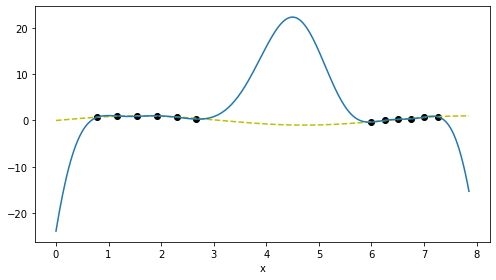

Lambda = 0.01


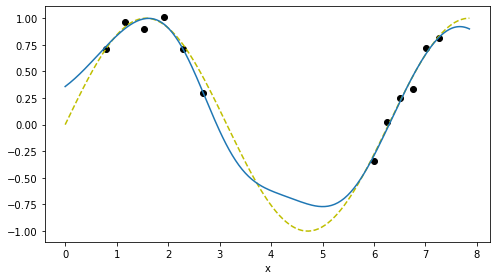

Lambda = 10


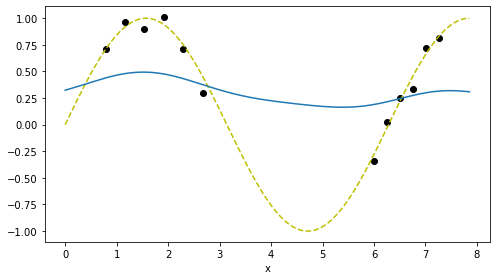

In [4]:
## PREDICTOR FOR TEST DATA
# 
def approxData_test(PHI_test,PHI_train, y_train,lam):
    #
    #### **** YOUR CODE HERE **** ####
    w_pls = fit_pls(PHI_train,y_train,lam)
    prediction = np.dot(PHI_test,w_pls)
    #
    return prediction
    
## GRAPHING FUNCTION 
#  
def plot_regression(approxData_test, x_train, y_train, x_test, y_test):
    #
    #### **** YOUR CODE HERE **** ####
    
    plt.figure(figsize=[7,4])
    plt.scatter(x_train,y_train,c="k")
    plt.plot(x_test,y_test,"--",c="y")    
    plt.plot(x_test,approxData_test)
    plt.xlabel("x")
    plt.tight_layout()
    plt.show()



# Add code to plot for lam=0,lam=0.01 and lam=10 case
#
#### **** YOUR CODE HERE **** ####
#

print("Lambda = 0")
p1 = approxData_test(PHI_test,PHI_train, y_train,0.0)
plot_regression(p1, x_train, y_train, x_test, y_test)
print("Lambda = 0.01")
p2 = approxData_test(PHI_test,PHI_train, y_train,0.01)
plot_regression(p2, x_train, y_train, x_test, y_test)
print("Lambda = 10")
p3 = approxData_test(PHI_test,PHI_train, y_train,10)
plot_regression(p3, x_train, y_train, x_test, y_test)



## Task 2a
**(2 marks)**

Write a function `compute_posterior` to compute the posterior mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ for the Bayesian linear regression model with basis matrix $\mathbf{\Phi}$ and with hyperparameters $\alpha$ and $\sigma^2$, where $\alpha = \lambda/\sigma^2$ for the equivalence.

Verify the consistency of your posterior code with `fit_pls` by comparing the outputs `w` and `Mu` (they should be the same). As well as defining your function below, append a few lines of code underneath which show your consistency check for $\lambda=0.01$.


In [5]:
## POSTERIOR
##
def compute_posterior(PHI, y, alph, s2):
    #
    #### **** YOUR CODE HERE **** ####
    lam = alph*s2
    inv_term = np.linalg.inv(np.dot(PHI.T,PHI) + lam * np.eye(len(y)))
    SIGMA = s2 * inv_term
    mu_y_term = np.dot(PHI.T,y)
    Mu = np.dot(inv_term,mu_y_term)
    
    #
    return Mu, SIGMA

# check consistency
#### **** YOUR CODE HERE **** ####

Mu, _ = compute_posterior(PHI_train, y_train, 0.01/s2, s2)
w = fit_pls(PHI_train,y_train,0.01)

if np.allclose(Mu,w):
    print('Outputs consistent')
else:
    print('Outputs inconsistent')

# Check whether your variables are defined as the requirement  ..
try:
    Mu
    w
except Exception as err:
    print('Error during checking consistency:', err)

Outputs consistent


## Task 2b
**(2 marks + 1 bonus mark)**

Write a function `compute_log_marginal` to compute the *logarithm* of the marginal likelihood for the Bayesian linear regression model with basis matrix $\mathbf{\Phi}$ and with hyperparameters $\alpha$ and $\sigma^2$.

In Lecture 04, we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters. The likelihood of the hyperparameters can also be treated as the evidence with respect to $\mathbf{w}$. 

In our lab 1 example, the integral form of evidence computation can be rewritten as follows:

$p(\mathbf{y}|\alpha, \sigma^2) = (2 \pi)^{-\frac{N}{2}} |\sigma^2 \mathbf{I} + \alpha^{-1} \mathbf{\Phi}\mathbf{\Phi}^{\top}|^{-\frac{1}{2}} \exp\{ -\frac{1}{2} \mathbf{y}^{\top} (\sigma^2 \mathbf{I} + \alpha^{-1} \mathbf{\Phi}\mathbf{\Phi}^{\top})^{-1} \mathbf{y}  \}$

In principle, please use `stats.multivariate_normal.logpdf` for log density computation (don't compute the pdf and then call `np.log`!).

In practice, you should not have numerical issues using `stats.multivariate_normal.logpdf` (this can happen if you experiment with larger data sets, in which case you may wish to look at the `allow_singular` argument.)

**Bonus**: there is an alternative, and more robust, way of calculating the marginal likelihood directly, which you may wish to explore if you are comfortable with linear algebra and matrix identities. (**1 bonus mark**)


In [6]:
## MARGINAL LIKELIHOOD
##
def compute_log_marginal(PHI, y, alph, s2):
    #
    #### **** YOUR CODE HERE **** ####
    cov = s2 * np.eye(len(PHI)) + 1/alph * np.dot(PHI,PHI.T)
    p_data = stats.multivariate_normal(cov = cov)
    llik = stats.multivariate_normal.logpdf(y.reshape(-1), cov=cov)
    
    return llik
    

### Bonus solution using direct calculation of log terms and cholesky decomposition of the covariance matrix

In [7]:
from scipy.linalg import cho_solve
def compute_log_marginal_bonus(PHI, y, alph, s2):
    y = y.reshape(-1)
    cov = s2 * np.eye(len(PHI)) + 1/alph * np.dot(PHI,PHI.T)
    L = np.linalg.cholesky(cov)
    a = y.dot(cho_solve((L,True),y))
    b = np.sum(np.log(np.diag(L)))
    l =  -0.5 * a - b - len(y) / 2. * np.log(2*np.pi)
    return l

print(f"For alpha = 1:\nResult using scipy.multivatiate_normal = {compute_log_marginal(PHI_train, y_train, 1, s2)}\nResult using cholesky decomposition = {compute_log_marginal_bonus(PHI_train, y_train, 1, s2)}")

For alpha = 1:
Result using scipy.multivatiate_normal = -2.690583961147133
Result using cholesky decomposition = -2.6905839611471087


# Task 2c
**(3 marks)**

In the cell below, write some code to replicate below figure (shown in Lecture 04) for the Gaussian RBF basis and the `y_train` data defined above. 

<img src="slide15.png" alt="Slide 15 from Lecture 4" style="width: 400px;"/>

In more detail, over a range of $\lambda$ (or equivalent $\alpha=\lambda/\sigma^2$) values, you should:

- Compute the train, validation and test set errors（`err_train`,`err_val`,`err_test`）for the penalised least-squares model (use your `fit_pls` to fit it, and the supplied `error_rms` in 'CM50268_CW1_Setup'to calculate the error). 
- Also compute the *negative* log marginal likelihood (`neglog_evidence`), using the function just written.
- Plot **all these curves on the same graph**, noting that the scale for the errors is different for that of the negative log marginal likelihood.
- In addition to plotting the graph below, add code to compute, and output (using `print`), the *test error* corresponding to the minimum point on: (1) the test error curve itself, (2) the validation curve, (3) the negative marginal likelihood curve.

For easiest interpretation and automarking, please define your $\lambda$ range logarithmically and **fix the range between $-13$ and $5$**. 

First use `np.linspace(begin,end,steps)` to create equally spaced values `v`, then specify `lambda = 10**v`. Please **fix the `steps` value as 100**.

You should find that your graph has a similar qualitative form to the above figure, although the test error curve looks rather "sharp".

**Hints:** 
- You can create a new $y$-axis on the same plot, which shares the $x$-axis, using `plt.gca().twinx()`.
- Remember that $\alpha=\lambda/\sigma^2$. If you don't rescale appropriately, the marginal likelihood curve will not be correctly aligned with the error curves and your minimum point will be incorrect.




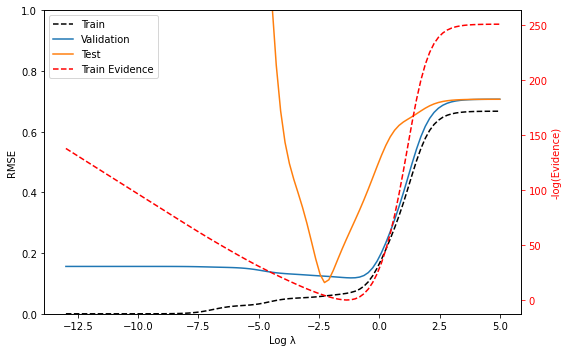

In [8]:
#
#### **** YOUR CODE HERE **** ####
#
#Set up plotting spaces

v = np.linspace(-13,5,100)
lam = 10**v
err_train = np.empty(100)
err_val = np.empty(100)
err_test = np.empty(100)
neglog_evidence = np.empty(100)

for i,l in enumerate(lam):
    t_train = approxData_test(PHI_train,PHI_train, y_train,l)
    err_train[i] = lab1.error_rms(t_train, y_train)
    
    t_val = approxData_test(PHI_val,PHI_train, y_train,l)
    err_val[i] = lab1.error_rms(t_val, y_val)
    
    t_test = approxData_test(PHI_test,PHI_train, y_train,l)
    err_test[i] = lab1.error_rms(t_test, y_test)
    
    neglog_evidence[i] = - compute_log_marginal(PHI_train, y_train, l/s2, s2)
    

plt.figure(figsize=[8,5])
l1, = plt.plot(v,err_train,'--',label='Train',c='k')
l2, = plt.plot(v,err_val,label='Validation')
l3, = plt.plot(v,err_test,label='Test')
plt.xlabel('Log λ')
plt.ylabel('RMSE')
plt.ylim([0,1])
ax2 = plt.gca().twinx()
l4, = ax2.plot(v,neglog_evidence,"--",c="r",label="Train Evidence")
ax2.set_ylabel('-log(Evidence)')
ax2.yaxis.get_label().set_color("r")
ax2.tick_params(axis='y', colors="r")
lines = [l1,l2,l3,l4]
ax2.legend(lines, [l.get_label() for l in lines])
plt.tight_layout()

#Calculate the error in the train, test and validation sets and 
# the negative log marginal likelihood for a range of lambda


## PLOT ALL THE CURVES ON THE SAME GRAPH


# Check whether your variables are defined as the requirement  ..
try:
    err_train
    err_val
    err_test
    neglog_evidence
except Exception as err:
    print('Error during Calculating the error and negative log marginal likelihood:', err)

In [17]:
## PRINT THE TEST ERROR
# Print the test error corresponding to the minimum point on (1) the test error curve itself,
# (2) the validation curve, (3) the negative marginal likelihood curve
#
#### **** YOUR CODE HERE **** ####
#
aval = np.argmin(err_val)
alik = np.argmin(neglog_evidence)

print(f"Minimum test error using:\n1) {'Test Error:'} {min(err_test):.04f}\n2) Validation Error: {err_test[aval]:.04f}\n3) Likelihood: {err_test[alik]:.04f} ")

Minimum test error using:
1) Test Error: 0.1029
2) Validation Error: 0.2776
3) Likelihood: 0.2457 


# Task 2d
**(2 marks)**

Find the best value of $\alpha$ according to the marginal likelihood in Task 2c above, call `compute_posterior` to find the posterior mean weight vector `Mu` and use this to compute the posterior mean predictor `y_post`  (*i.e.* $y=\Phi\mu$) at all the test points `x_test`. Then, similar to Task 1b, using your earlier `plot_regression` function, plot on the same axes:
1. the training data (`x_train` / `y_train`),
2. the underlying generating function (by plotting `x_test` and `y_test`),
3. the posterior mean predictor function you just calculated.

You should find that the predictor is a pretty good fit to the underlying generating function *where there was data in the training set*. We can't expect the model to make good predictions in the "gap" where it has not seen any training data (unless it gets lucky!).


Lambda = 0.043288


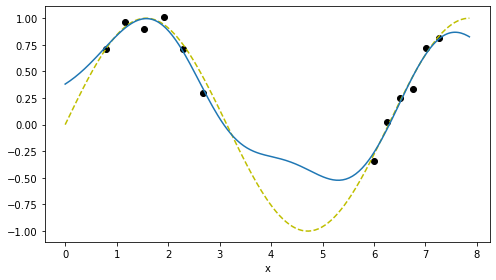

In [18]:
# add code to calculate posterior mean predictor and plot
#### **** YOUR CODE HERE **** ####

l_opt = lam[np.argmin(neglog_evidence)]
a_opt = l_opt / s2
mu_opt, s_opt = compute_posterior(PHI_train, y_train, a_opt, s2)
y_post = np.dot(PHI_test,mu_opt)

print(f"Lambda = {l_opt:.06f}")
plot_regression(y_post, x_train, y_train, x_test, y_test)


# Check whether your variables are defined as the requirement  ..
try:
    y_post
except Exception as err:
    print('Error during calculating posterior :', err)

# Task 3a
**(2 mark)**

Repeat the graph above (Task 2d), for the same "best" predictor, but this time also compute the predictive variance matrix `var_matrix` at the points `x_test` and add them to the same plot as "error bars". For plotting the "error bars", you need to calculate the upper and lower bound for the predicted value ( `upper_bound`,`lower_bound`). 

**Notes:**

- By "error bars" we mean the predictive standard deviation, please fix the error bars by +/- one standard deviation,
- To compute the predictive variance at `x_test`, you'll need the matrix `PHI_test`,
- The matplotlib function `plt.fill_between` is a handy utility for plotting error bars,
- If your calculations are correct, you should expect to see larger error bars where there is no data.

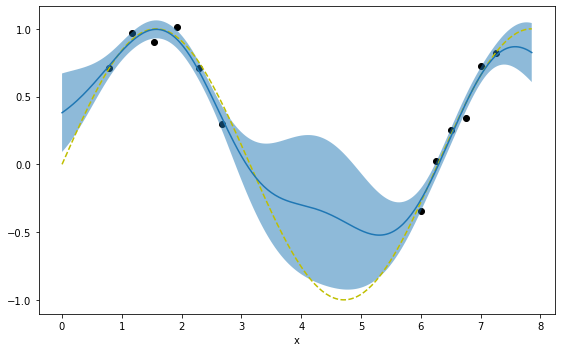

In [11]:
#### **** YOUR CODE HERE **** ####

inv_term = np.linalg.inv(np.dot(PHI_train.T,PHI_train) + l_opt * np.eye(len(PHI_train)))
covar_opt = np.dot(np.dot(PHI_test,s2 * inv_term),PHI_test.T)
var_matrix = np.diagonal(covar_opt)
std_pred = np.sqrt(var_matrix)
upper_bound,lower_bound = y_post.reshape(-1) + std_pred, y_post.reshape(-1) - std_pred

fig = plt.figure(figsize=[8,5])
plt.scatter(x_train,y_train,c="k")
plt.plot(x_test,y_test,"--",c="y")    
plt.plot(x_test,y_post)
plt.xlabel("x")
plt.tight_layout()
plt.fill_between(x_test.reshape(-1),upper_bound,lower_bound,alpha=0.5)
plt.show()


# Check whether your variables are defined as the requirement  ..
try:
    var_matrix
    upper_bound
    lower_bound
except Exception as err:
    print('Error during calculating error bars:', err)

# Task 3b 
**(1 bonus mark)**

This is a more open-ended question, with an opportunity to think more creatively. (Note that there are only two marks available though.)

Imagine you had built the above model for inclusion within some real-world system where it was desired to make predictions at some arbitrary points $x$ in the future. How might the information from your model's predictive variance be useful in the practical application?

Remember that the predictive model is an $x$-dependent Gaussian distribution over the prediction, and in principle the variance quantifies the likely error (which is a consequence both of the noise on the data and any model uncertainty).

More specifically, your answer might look to address the following questions:

- how could the system exploit the predictive variance to practical advantage on new data?
- what evidence can you supply now (based on the existing test data set) to suggest the approach might work?

Explain what you might do in the text box below (no more than 200 words is suggested), and in the following box, generate whatever graph(s) you would offer as supporting evidence for the utility of your approach.


## Using the predictive variance in practice

**Add your explanation here.**



One potential application of a bayesian regression model could be in the area of insurance pricing. A number of factors are usually taken into consideration to set a rate, with previous data of related situations being used to predict the costs of each policy and hence set the price.

With a bayesian model, predictions for the cost of a specific insurance policy where there is a large amount of data available will return a low variance. In instances where there is little previous data available for predictions, the model will return a much larger variance and the cost of the policy will be increased appropriately to factor for this.

This behaviour is shown in our example in the central part of the graph above with no training data. The models predictive variance is much larger here than where data was observed, quantifying the uncertainty about predictions in this region.